## 模拟：标准正态分布的箱线图和小提琴图

我们模拟生成一个服从 $N(0,1)$ 分布的随机数，$N=5000$，然后分别绘制其直方图 (核密度函数图)、箱线图和小提琴图。

生成 Python 代码的提示词如下：

```md
- Data: 生成一个服从标准正态分布的随机变量，x ~ N(0,1)；
- Statistics: 列表呈现 
              Mean, Median, Q1, Q3, IQR, 
              Q1+1.5*IQR, Q3+1.5*IQR, Min, Max；
- Graph: 一行三列，左边是直方图+密度函数图；
                  中间是箱线图；
                  右边是小提琴图。
         尺寸：9*3；横轴刻度范围 -4, +4
- N = 5000, seed=123
- cell: 能够独立运行，Python 代码
```

将上述提示词贴入 Github Copilot 中的 `Generate` 对话框，或 ChatGPT, DeepSeek 等 AI 工具中，生成的代码如下：


Mean: 0.02
Median: 0.03
Q1: -0.65
Q3: 0.69
IQR: 1.34
Q1-1.5*IQR: -2.66
Q3+1.5*IQR: 2.70
Min: -3.80
Max: 3.57


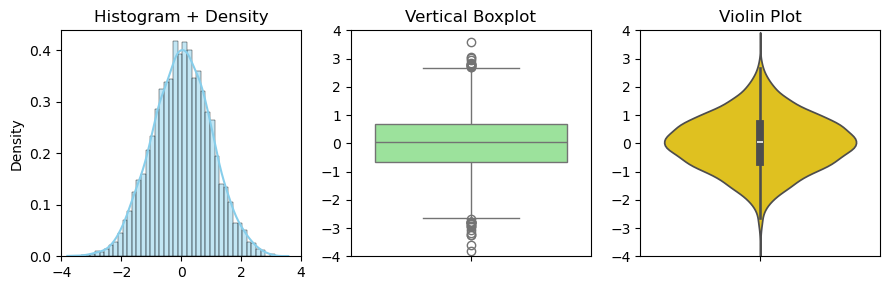

In [1]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(123)

# Generate a random variable x ~ N(0, 1)
N = 5000
x = np.random.normal(0, 1, N)

# Calculate statistics
mean = np.mean(x)
median = np.median(x)
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3 - q1
q1_1_5_iqr = q1 - 1.5 * iqr
q3_1_5_iqr = q3 + 1.5 * iqr
min_val = np.min(x)
max_val = np.max(x)

# Display statistics
statistics = {
    "Mean": mean,
    "Median": median,
    "Q1": q1,
    "Q3": q3,
    "IQR": iqr,
    "Q1-1.5*IQR": q1_1_5_iqr,
    "Q3+1.5*IQR": q3_1_5_iqr,
    "Min": min_val,
    "Max": max_val
}
for stat, value in statistics.items():
    print(f"{stat}: {value:.2f}")

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

# Plot histogram + density function on the left
sns.histplot(x, kde=True, ax=axes[0], color="skyblue", stat="density")
axes[0].set_title("Histogram + Density")
axes[0].set_xlim(-4, 4)
axes[0].set_ylabel("Density")

# Plot vertical boxplot in the middle
sns.boxplot(y=x, ax=axes[1], color="lightgreen")
axes[1].set_title("Vertical Boxplot")
axes[1].set_ylim(-4, 4)

# Plot violin plot on the right
sns.violinplot(y=x, ax=axes[2], color="gold")
axes[2].set_title("Violin Plot")
axes[2].set_ylim(-4, 4)

# Adjust layout
plt.tight_layout()
plt.savefig("../figs/graph_boxplot_violin_simu_Normal.png", dpi=100, bbox_inches="tight")
plt.show()

## 小提琴图图示

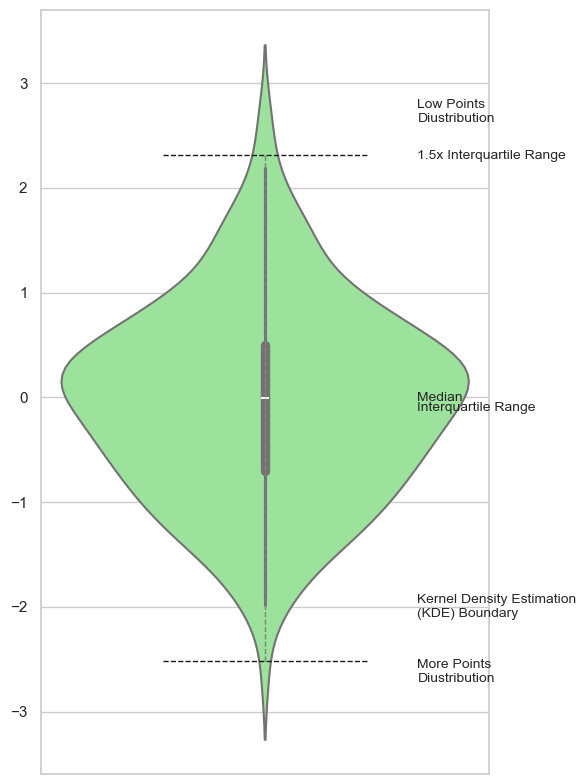

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 设置画图风格
sns.set(style="whitegrid")

# 构造示例数据
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=200)

# 创建图形和子图
fig, ax = plt.subplots(figsize=(6, 8))

# 绘制小提琴图
sns.violinplot(y=data, inner='box', linewidth=1.5, color="lightgreen", ax=ax)

# 添加辅助注释
quartiles = np.percentile(data, [25, 50, 75])
iqr = quartiles[2] - quartiles[0]
low_bound = quartiles[0] - 1.5 * iqr
high_bound = quartiles[2] + 1.5 * iqr

# 绘制 1.5x IQR 区间虚线框
ax.plot([-0.2, 0.2], [low_bound, low_bound], 'k--', lw=1)
ax.plot([-0.2, 0.2], [high_bound, high_bound], 'k--', lw=1)
ax.vlines(x=0, ymin=low_bound, ymax=high_bound, color='gray', linestyle='--', lw=1)

# 添加文字注释
ax.text(0.3, quartiles[1], 'Median', va='center', fontsize=10)
ax.text(0.3, (quartiles[0]+quartiles[2])/2, 'Interquartile Range', va='center', fontsize=10)
ax.text(0.3, high_bound, '1.5x Interquartile Range', va='center', fontsize=10)
ax.text(0.3, np.max(data), 'Low Points\nDiustribution', va='center', fontsize=10)
ax.text(0.3, np.min(data), 'More Points\nDiustribution', va='center', fontsize=10)
ax.text(0.3, -2, 'Kernel Density Estimation\n(KDE) Boundary', va='center', fontsize=10)

# 隐藏x轴标签
ax.set_xticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# 显示图形
plt.tight_layout()
plt.show()
